In [4]:
import nibabel
import scipy.misc
from nilearn import plotting
from nilearn.datasets import MNI152_FILE_PATH
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
import math
from scipy.interpolate import RegularGridInterpolator
import numpy.linalg as npl

(512, 512, 115)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


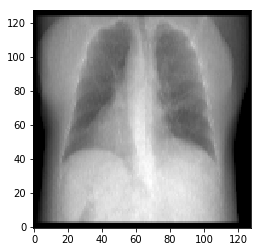

In [2]:
import nibabel
import scipy.misc
from nilearn import plotting
from nilearn.datasets import MNI152_FILE_PATH
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
import math
from scipy.interpolate import RegularGridInterpolator
import numpy.linalg as npl

width = 512 // 4
height = 512 // 4
depth = 512 // 4

class Ray:

    def __init__(self, i, j):
        self.i = i
        self.j = j

img = nibabel.load('/home/anya/Documents/sem6/kursach/init_data/case-5eb926ce-b138-4cb6-84f8-f9805724339d/CT_body.nii.gz')
img_data = img.get_fdata()
print(img_data.shape)

voxToWorld = img.affine
worldToVox = npl.inv(voxToWorld)

min_z = -1200

def interpolate(x, a, b):
    return (b - a) * x + a

def norm(x):
    min = -1024
    max = 2438

    return (x - min) / (max - min)



c = [width / img_data.shape[0], height / img_data.shape[1], depth / img_data.shape[2]]

def get_voxel_color(index):
    index1 = (math.floor(index[0] / c[0]), math.floor(index[1] / c[1]), math.floor(index[2] / c[2]))
    index2 = (math.floor(index[0] / c[0]), math.floor(index[1] / c[1]), math.ceil(index[2] / c[2]))

    if index2[2] >= img_data.shape[2]:
        return 0
    value1 = img_data[index1]
    value2 = img_data[index2]

    coord = index[2] / c[2]
    x = (coord - index1[2]) # (x - a) / (b - a) where (b - a) = 1
    value = interpolate(x, value1, value2)
    if value == -1000:
        return 0 # this is an artificial value for black voxels
    return norm(value)

def ray_trace(ray):
    v = 0
    current_color = 0
    current_opacity = 0


    while True:
        v += 1
        if v >= height:# or current_opacity > 0.99:
            break

        color = get_voxel_color((ray.i, v, ray.j))
        voxel_color = color
        voxel_opacity = color

        color *= 1 - current_opacity
        #current_color += color * voxel_opacity
        current_opacity += (1 - current_opacity) * voxel_opacity

        current_color += voxel_color

    return current_color


drr = np.zeros((width, height))

for i in range(0, width):
    print(i)
    for j in range(0, depth):
        ray = Ray(i, j)
        color = ray_trace(ray)
        drr[j, i] = color


fig, axes = plt.subplots(1, 1)
plt.imshow(drr, cmap="gray", origin="lower")


In [ ]:
a = 5